## High and Low Pass Filters

Now, you might be wondering, what makes filters high and low-pass; why is a Sobel filter high-pass and a Gaussian filter low-pass?

Well, you can actually visualize the frequencies that these filters block out by taking a look at their fourier transforms. The frequency components of any image can be displayed after doing a Fourier Transform (FT). An FT looks at the components of an image (edges that are high-frequency, and areas of smooth color as low-frequency), and plots the frequencies that occur as points in spectrum. So, let's treat our filters as small images, and display them in the frequency domain!

In [3]:
# git partially cloning
repo='cvnd-exercises'
sub_dir='1_2_Convolutional_Filters_Edge_Detection'
url='https://github.com/linked0/' + repo + '.git'
!mkdir $repo
%cd $repo
!git init
!git remote add -f origin $url
!git config core.sparsecheckout true
!echo $sub_dir >> .git/info/sparse-checkout
!git pull --recurse-submodules origin master
%cd $sub_dir
!ls


/content/cvnd-exercises
Initialized empty Git repository in /content/cvnd-exercises/.git/
Updating origin
remote: Counting objects: 591, done.
remote: Compressing objects: 100% (572/572), done.
remote: Total 591 (delta 32), reused 560 (delta 18), pack-reused 0
Receiving objects: 100% (591/591), 127.52 MiB | 42.11 MiB/s, done.
Resolving deltas: 100% (32/32), done.
From https://github.com/linked0/cvnd-exercises
 * [new branch]      master     -> origin/master
From https://github.com/linked0/cvnd-exercises
 * branch            master     -> FETCH_HEAD
/content/cvnd-exercises/1_2_Convolutional_Filters_Edge_Detection
1. Fourier Transform.ipynb
2. Finding Edges and Custom Kernels.ipynb
3. Gaussian Blur.ipynb
4. Fourier Transform of Filters.ipynb
5. Canny Edge Detection.ipynb
6_1. Hough lines.ipynb
6_2. Hough circles, agriculture.ipynb
7. Haar Cascade, Face Detection.ipynb
detector_architectures
images


In [5]:
!pwd

/content/cvnd-exercises/1_2_Convolutional_Filters_Edge_Detection


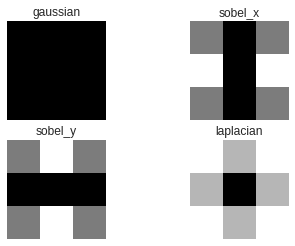

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

# Define gaussian, sobel, and laplacian (edge) filters

gaussian = (1/9)*np.array([[1, 1, 1],
                           [1, 1, 1],
                           [1, 1, 1]])

sobel_x= np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])

sobel_y= np.array([[-1,-2,-1],
                   [0, 0, 0],
                   [1, 2, 1]])

# laplacian, edge filter
laplacian=np.array([[0, 1, 0],
                    [1,-4, 1],
                    [0, 1, 0]])

filters = [gaussian, sobel_x, sobel_y, laplacian]
filter_name = ['gaussian','sobel_x', \
                'sobel_y', 'laplacian']


# perform a fast fourier transform on each filter
# and create a scaled, frequency transform image
f_filters = [np.fft.fft2(x) for x in filters]
fshift = [np.fft.fftshift(y) for y in f_filters]
frequency_tx = [np.log(np.abs(z)+1) for z in fshift]

# display 4 filters
for i in range(len(filters)):
    plt.subplot(2,2,i+1),plt.imshow(frequency_tx[i],cmap = 'gray')
    plt.title(filter_name[i]), plt.xticks([]), plt.yticks([])

plt.show()

Areas of white or light gray, allow that part of the frequency spectrum through! Areas of black mean that part of the spectrum is blocked out of the image. 

Recall that the low frequencies in the frequency spectrum are at the center of the frequency transform image, and high frequencies are at the edges. You should see that the Gaussian filter allows only low-pass frequencies through, which is the center of the frequency transformed image. The sobel filters block out frequencies of a certain orientation and a laplace (detects edges regardless of orientation) filter, should block out low-frequencies!

You are encouraged to load in an image, apply a filter to it using `filter2d` then visualize what the fourier transform of that image looks like before and after a filter is applied.

In [41]:
## TODO: load in an image, and filter it using a kernel of your choice
## apply a fourier transform to the original *and* filtered images and compare them
!ls images

birds.jpg	    curved_lane.jpg  phone.jpg	      stripes.jpg
brain_MR.jpg	    face1.jpg	     pink_solid.jpg   sunflower.jpg
city_hall.jpg	    face2.jpg	     round_farms.jpg
city_hall_zoom.png  multi_faces.jpg  sobel_ops.png


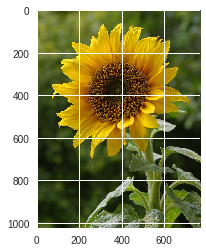

In [54]:
import matplotlib.image as mpimg
sun = mpimg.imread('images/sunflower.jpg')
plt.imshow(sun)
plt.grid = False

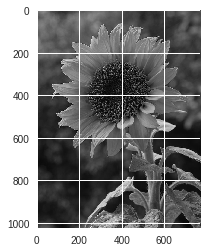

In [55]:

gray = cv2.cvtColor(sun, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

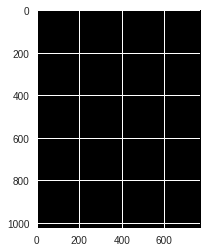

In [58]:
blur = cv2.filter2D(gray, -1, gaussian)
dst = cv2.filter2D(gray,-1,gaussian)
plt.imshow(blur, cmap='gray')

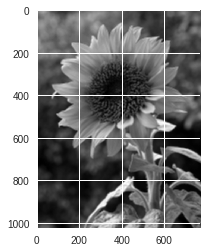

In [59]:
blur = cv2.blur(gray,(9,9))
plt.imshow(blur, cmap='gray')

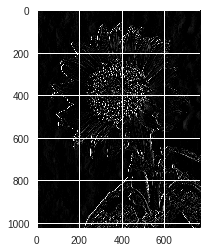

In [62]:
sun_sobelx = cv2.filter2D(gray, -1, sobel_x)
plt.imshow(sun_sobelx, cmap='gray')

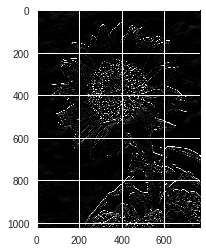

In [63]:
sun_sobely = cv2.filter2D(gray, -1, sobel_y)
plt.imshow(sun_sobely, cmap='gray')

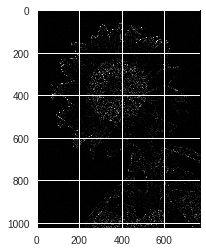

In [64]:
sun_laplac = cv2.filter2D(gray, -1, laplacian)
plt.imshow(sun_laplac, cmap='gray')